ECE 447: Linearization and Eigenvalues
===
What nonlinear systems look like locally.

Prof. Eric Klavins

&copy; 2019, University of Washington

In [187]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    for i in range(len(matrices)):
        a = np.array(matrices[i]).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2
        x2dot = a[1,0]*x1 + a[1,1]*x2
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r')
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(titles[i])
    return None

Diagonalization
===

Consider the system 

$$
\dot x = A x
$$

and say $A$ has distinct real eigenvalues $\lambda_1$ and $\lambda_2$ with eigenvectors $v_1$ and $v_2$. Then

$$
A v_1 = \lambda_1 v_1 \\
A v_2 = \lambda_2 v_2 
$$

which can be written

$$
\left( A v_1 \; A v_2 \right) = ( \lambda v_1 \; \lambda v_2 )
$$

or even better

$$
A ( v_1 \; v_2 ) = ( v_1 \; v_2 ) 
\begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

If we define 

$$
P = ( v_1 \; v_2 )
$$

and 

$$
D = \begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

then we get

$$
AP = PD
$$

or

$$
A = PDP^{-1}
$$

When there exists a $P$ that satisfies this last equation (whether $D$ is diagonal or not), then $A$ and $D$ are called *similar*. 

Jordan Form
---
More generally (i.e. when the eigenvalues are not distinct), any matrix is similar to one in *Jordan Form*, which is a canonical representation of a matrix. Having a matrix in a canonical form makes it easy to see what it does as a dynamical system. More on this later.

The Eigenvalues of Similar Matrices are Equal
---

If $A = PQP^{-1}$ and $\lambda$ is an eigenvalue of $A$, then for an eigenvector $x$ then

$$
Q P x = P A P^{-1} P x = P A x = P \lambda x = \lambda P x
$$

thus, $\lambda$ is also an eigenvalue of $Q$ with eigenvector $P x$. 

P is a Change of Coordinates
---

If $A = PQP^{-1}$ define $z = P^{-1}x$ then $x = P z$ and 

$$
\dot z = P^{-1}\dot x = P^{-1} A x = P^{-1} A P z = Q z
$$

Thus, the dynamics of $z$ are "similar" to the dynamics of $x$. And because they have the same eigenvalues, you can use either $A$ or $Q$ to understand the stability of either system.

$A$ is a squashed, rotated, and/or reflected version of $Q$
---

Matrix([[-1/2 + sqrt(5)/2, 0], [0, -sqrt(5)/2 - 1/2]])


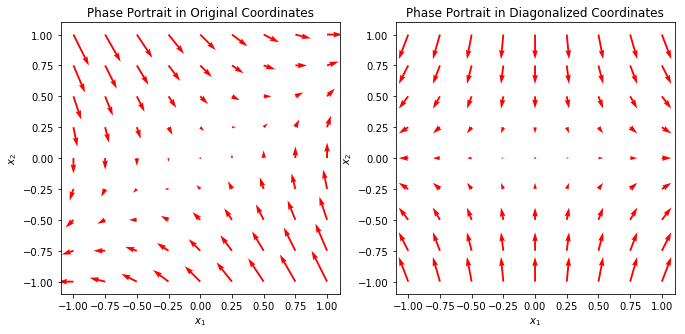

In [205]:
# Example matrix
A = Matrix([[0, 1], [1,-1]])
P, Q = A.diagonalize()
print(Q)
plot_phase_portrait(
    [A,Q],
    [
        "Phase Portrait in Original Coordinates",
        "Phase Portrait in Diagonalized Coordinates"
    ])

Real, Distinct Eigenvalues, Same Sign
===

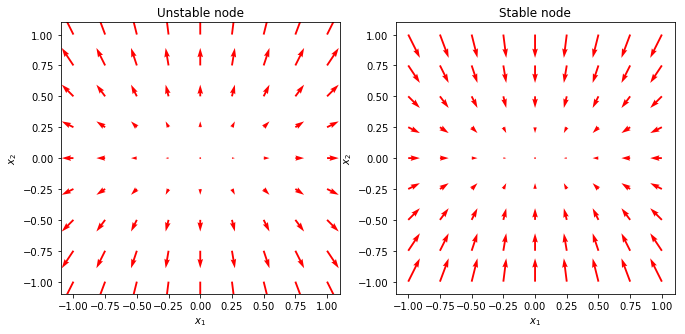

In [189]:
plot_phase_portrait(
    [
        Matrix([[1,0],[0,2]]) ,
        Matrix([[-1,0],[0,-2]])
    ],
    [
        "Unstable node",
        "Stable node"
    ])

Real, Opposite Signs
===

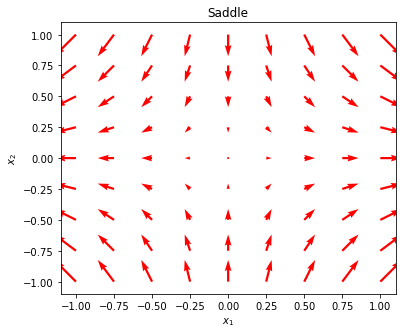

In [190]:
plot_phase_portrait(
    [
        Matrix([[1,0],[0,-1]])
    ],
    [
        "Saddle"
    ])

Repeated Eigenvalues
===

Note that the canonical matrix for repeated eigenvalues has two cases. One is just

$$
A = \begin{pmatrix}
a & 0 \\
0 & a
\end{pmatrix}
$$

which looks a lot like the unrepeated case, and the other is 

$$
A = \begin{pmatrix}
a & 1 \\
0 & a
\end{pmatrix}
$$

Evaluating $|\lambda I - A|$ results in 

$$
\left|\begin{pmatrix}
\lambda - a & -1 \\
0 & \lambda - a
\end{pmatrix}\right| = (\lambda-a)^2
$$

which has roots $a$ and $a$. 

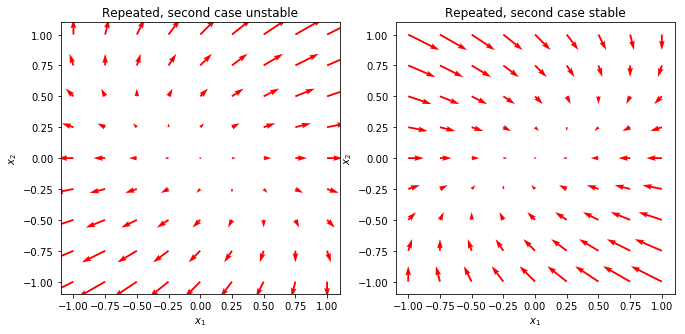

In [197]:
plot_phase_portrait(
    [
        Matrix([[1,1],[0,1]]) ,
        Matrix([[-1,1],[0,-1]])
    ],
    [
        "Repeated, second case unstable",
        "Repeated, second case stable"
    ])

One eigenvalue zero
===

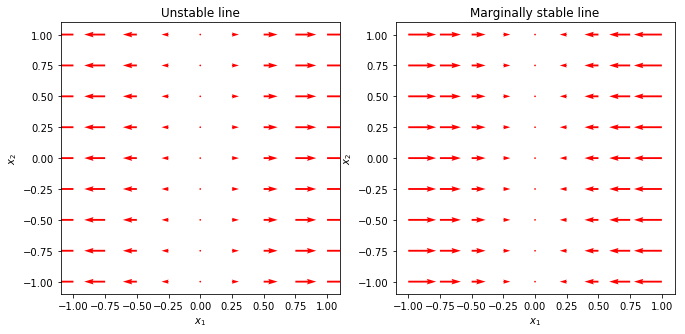

In [198]:
plot_phase_portrait(
    [
        Matrix([[1,0],[0,0]]) ,
        Matrix([[-1,0],[0,0]])
    ],
    [
        "Unstable line",
        "Marginally stable line"
    ])

Complex Eigenvalues
===

The canonical form for a matrix with complex conjugate eigenvalues is

$$
A = \begin{pmatrix}
a & b \\
-b & a
\end{pmatrix}
$$

Evaluating $|\lambda I - A|$ results in 

$$
\left|\begin{pmatrix}
\lambda - a & -b \\
b & \lambda + -a
\end{pmatrix}\right| = (\lambda - a )^2 + b^2 = \lambda^2 - 2 a \lambda + a^2 + b^2
$$

which has roots $a \pm b i$.

To understand what these matrices do, you can use polar coordinates. Set

$$
r = \sqrt{x_1^2 + x_2^2} \\
\theta = \arctan(x_2,x_2)
$$

then 

$$
r^2 = x_1^2 + x_2^2
$$

and 

$$
2 r \dot r = 2 x_1 \dot x_1 + 2 x_2 \dot x_2
$$

However, since $\dot x_1 = ax_1 + bx_2$ and $\dot x_2 = -bx_1 + ax_2$, we get (after canceling the 2):

\begin{align}
r \dot r & = x_1 (ax_1 + bx_2) + x_2 (-bx_1 + ax_2) \\
\; & = a x_1^2 + a x_2^2 = a r^2
\end{align}

and thus

$$
\dot r = a r
$$

Also, 

$$
\tan \theta = \frac{x_2}{x_1}
$$

so

$$
\dot\theta\sec^2\theta  = \frac{x_1 \dot x_2 - \dot x_1x_2}{x_1^2}
$$

Substituting in again gives

\begin{align}
\dot\theta\sec^2\theta & = \frac{x_1 (-bx_1 + ax_2) - (ax_1 + bx_2)x_2}{x_1^2} \\
\; & = - b \frac{x_1^2+x_2^2}{x_1^2}
\end{align}

which means (using the fact that sec is hypotenus over adjacent) that

$$
\dot \theta = -b
$$

Thus, we can see that as long as $a<0$, then the system will spiral inwards. If $a=1$ then you get endless circles at the same radius. And if $a>0$ you get unstable spirals outwards. Furthermore, $b$ indicates the direction of the spiral.

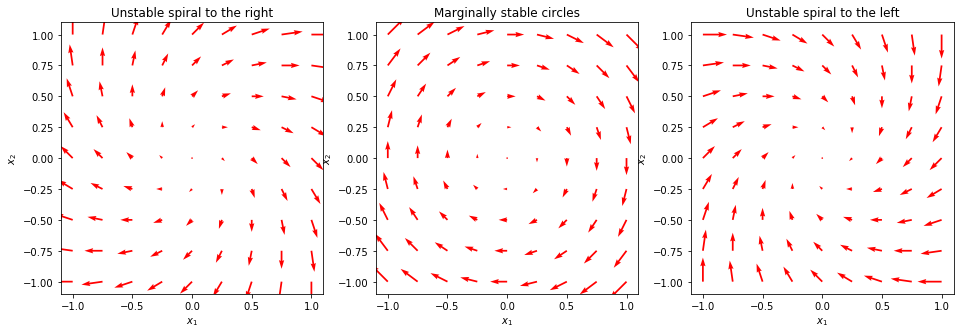

In [203]:
plot_phase_portrait(
    [
        Matrix([[1,1],[-1,1]]),
        Matrix([[0,1],[-1,0]]),
        Matrix([[-1,1],[-1,-1]])
    ],
    [
        "Unstable spiral, clockwise",
        "Marginally stable circles, clockwise",
        "Unstable spiral, clockwise",
    ])

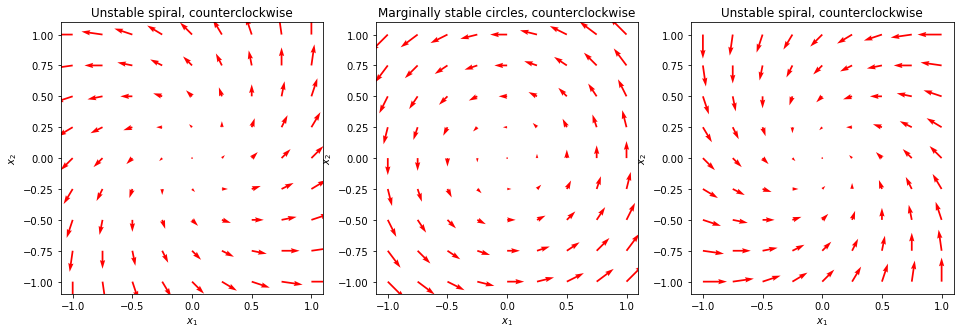

In [204]:
plot_phase_portrait(
    [
        Matrix([[1,-1],[1,1]]),
        Matrix([[0,-1],[1,0]]),
        Matrix([[-1,-1],[1,-1]])
    ],
    [
        "Unstable spiral, counterclockwise",
        "Marginally stable circles, counterclockwise",
        "Unstable spiral, counterclockwise",
    ])

An example
===

Suppose that 

\begin{align}
\dot x_1 & = x_2 \\
\dot x_2 & = (x_1-1)(x_1+1) - x_2
\end{align}

The equalibirum points are

\begin{align}
x_2 & = 0 \\
x_1 & = \pm 1.
\end{align}

Next we figure out what kind of linear system approximates the dynamics around each point. The Jacobian is

\begin{align}
J & = \begin{pmatrix}
\frac{\partial x_2}{\partial x_1} & 
\frac{\partial x_2}{\partial x_2} \\
\frac{\partial (x_1-1)(x_1+1) - x_2}{\partial x_1} & 
\frac{\partial (x_1-1)(x_1+1) - x_2}{\partial x_2} \\
\end{pmatrix} \\
\; & = \begin{pmatrix}
0 & 1 \\
2 x_1 & -1
\end{pmatrix}.
\end{align}

At $-1,0$ we get

$$
A = \begin{pmatrix}
0 & 1 \\
-2 & -1
\end{pmatrix} 
$$

which has eigenvalues

In [208]:
Matrix([[0,1],[-2,1]]).eigenvals()

{1/2 - sqrt(7)*I/2: 1, 1/2 + sqrt(7)*I/2: 1}

Thus, the point $(-1,0)$ is an unstable spiral. 

On the other hand, at $1,0$ we get

$$
A = \begin{pmatrix}
0 & 1 \\
2 & -1
\end{pmatrix} 
$$

which has eigenvalues 

In [209]:
Matrix([[0,1],[2,1]]).eigenvals()

{-1: 1, 2: 1}

which is a saddle point. We can find the eigenvectors to locate the axes of the saddle.

In [210]:
P,D = Matrix([[0,1],[2,1]]).diagonalize()
P

Matrix([
[-1, 1],
[ 1, 2]])

So the stable axis is the line $x_22 = x_1$ and the unstable axis is $x_2 = 2x_1$. We can use this information to draw a complete picture.

![](https://raw.githubusercontent.com/klavins/ECE447/master/images/nonlinear-phase-portrait.png)

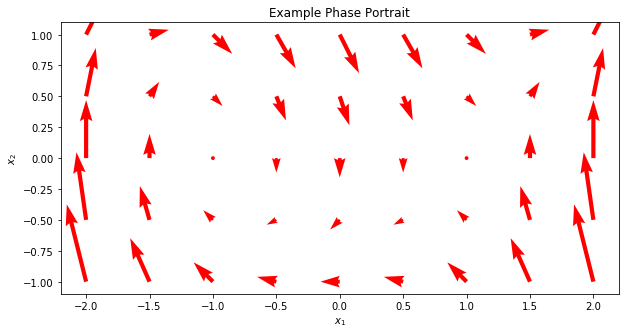

In [221]:
x1,x2 = np.meshgrid(np.linspace(-2, 2, 9),np.linspace(-1, 1, 5))
x1dot = x2
x2dot = (x1-1)*(x1+1)-x2
plt.rcParams['figure.figsize'] = [10,5]
plt.quiver(x1, x2, x1dot, x2dot, color='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Example Phase Portrait");